# Decision Trees
### Author: _Calvin Chi_

# 1. Introduction
Decision tree is a type of machine learning algorithm that can be used for both classification and regression. The central idea of a decision tree is to literally build a decision tree on different features of the data until we can confidently separate classes from each other. This concept is probably best illustrated through a diagram.

<img src="http://i.imgur.com/TDQLt7D.png", width=500, height=500>

The example above is a simple decision tree for deciding whether to go out or not. The decision to go out or not can be viewed as the label, and the attributes that the decision depends on in the above diagram are outlook, humidity, and wind. 

What makes a good attribute to decide on? Intuitively, it would be an attribute that can separate one class from the other. For example, if a person is strongly likely to go out if the wind is weak and not likely otherwise, then the attribute wind is a good attribute. 

In creating a decision tree, this objective is stated as the attribute that minimizes uncertainty, with entropy being a common measure of uncertainty. Qualitatively, high entropy implies high uncertainty, while low entropy implies low uncertainty. If a certain attribute can well-separate our samples into their respective classes, then the entropy is reduced because we are more certain about the class of our samples. For example, once we know whether the wind is strong or not, we are then more certain whether this person went out or not. Before diving into decision trees, we must first understand what entropy is. 

# 2. Entropy
Qualitatively, entropy measures uncertainty or disorder. High entropy indicates high disorder. High entropy is qualitatively expressed as:

$$H = \sum_{i=1}^{m} p_{i}log_{2}\:\frac{1}{p_{i}} = -\sum_{i=1}^{m} p_{i}log_{2}\:p_{i}$$

Where $i$ is a class and $p_{i}$ is the probability of class $i$. 

Let us plot entropy values for two classes across the range of values $p$ can take on. In our example, if $p_{1} = 0.3$, then $p_{2}$ is necessarily $0.7$.

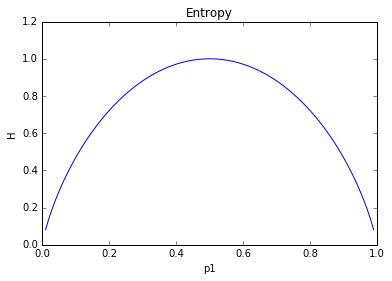

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
p = np.linspace(0.01, 0.99, 100, endpoint=True)

def entropy(p):
    q = 1 - p
    return -(p*np.log2(p) + q*np.log2(q))

h = entropy(p)
plt.plot(p, h)
plt.title("Entropy")
plt.xlabel("p1")
plt.ylabel("H")
plt.ylim(0, 1.2)
plt.show()

We can see that entropy is maximized at $p = 0.5$. A value of $p = 0.5$ means we are $50\%$ certain that a sample belongs to class, thus the uncertainty is great. However, at $p = 0.9$, we are $90\%$ certain, so entropy is low. At $p = 0.1$, although we are only $10\%$ sure that the sample belongs to one class, but that also means we are $90\%$ sure it belongs to the other, thus our certainty is still high.

What is the intuition behind the entropy equation? Let's say we have an item belonging to a set of classes with a probability distribution, and we would like to guess what class that item belongs to by asking whether an item belongs to class $i$. To minimize the questions we need to ask, we would start by asking whether the item belongs to a class in decreasing class probability. The expression $\frac{1}{p_{i}}$ captures the number of questions we need to ask according to this scheme to discover the item belonging to class $i$. Thus, we will need to ask more questions to get to the class occuring with low probability. Now it is clear that entropy equation represents the expected number of questions we need to ask given a certain class probability distribution to identify the class of the item. 

Lastly, it is worthy to note that given the number of classes $m$, the values that entropy can take on is $H \in [0,\:log_{2}\:m]$. Also, when values of entropy are only used for comparison, it does not matter the base of the log, since changing the base only changes the value of entropy by a constant factor according to the mathematical rule: 

$$log_{b}a = \frac{log_{c}a}{log_{c}b}$$

# 3. Optimization
With the definition of entropy set, we now state that the goal of each decision in a decision tree is to reduce entropy. Given a collection of classes, a decision should divide the collection into two groups such that the average entropy of the two groups is lower than the original entropy in the collection. 

In the implementation of this tutorial, our simple decision tree will have the following features:

+ At each node, it chooses the attribute (feature) and attribute value that maximizes the information gain from splitting. 
    + Categorical attributes: pick a class that we will denote $a$ , then calculate for each category the number of samples of that category with class $a$ divided by the total number of samples with class $a$. Sort categories according to the proportion and choose the best split point going from left to right. 
    + Continuous attributes: sort by attribute value, then choose best split point going from left to right only at attribute values where the class changes from the current sample to the next sample. Choosing split points where class changes will always yield lower entropy than choosing split points from a stretch of sorted attribute values of samples with the same class. 
+ Once a parent node chooses an attribute, it will never be used by its children.
+ Stopping criteria: the rationale for a stopping criteria is to prevent the tree from growing too deep. This prevents the pitfall of a decision tree to overfit and thus not generalize well to other datasets. 
    + Entropy at a node is less than $p\%$ of the maximum entropy while having less than $n$ samples.
    + All labels at a node are the same.
    + No more attributes left to split on.
+ The class outputted by leaf nodes will be the majority class of samples that "arrive" at the node. 


# 4. Ensembling
Ensembling is the method of combining multiple weak classsifiers to form one strong classifier. Why does this work? Ensembling is inspired by the "wisdom of crowd" concept best explained [here](http://www.npr.org/2015/08/20/432978431/wighty-issue-cow-guessing-game-helps-to-explain-the-stock-market). 

Ensembling with decision trees gives rise to random forests. In our random forest implementation, we shall perform:

## 4.1 Bagging
Bagging: generate bootstrap replicates of a training set. Each one of these replicates will be used to construct a decision tree. What is a bootstrap? Pretend we have $n$ training samples, a boostrap is a random sampling with replacement of $n$ samples from our original $n$ training samples. It is often viewed as a way to artificially generate different datasets. On average, how much of the original dataset is represented in each boostrap? Let us utilize the concepts of probability. The probability of a sample not getting selected to a bootstrap is:

> $$p = 1 - \frac{1}{n}$$

> As each sample has a $\frac{1}{n}$ chance of getting selected in each sampling attempt while constructing the boostrap, the probability that a sample will never make it to a boostrap is

> $$p = \big(1 - \frac{1}{n}\big)^{n} \approx \frac{1}{e} \approx 0.368$$

> The probability that a sample will appear at least once in a boostrap is thus $1 - 0.368 = 0.632$. Taking a frequentist interpretation to probability, we can expect each bootstrap to contain about $0.632\%$ of the original dataset with replicates.

## 4.2 Randomness
Even with slightly different datasets, given that the attributes to choose from are approximately the same at each node, each tree in the random forest will be correlated and this result will counter to our goal of introducing randomness to our ensembling model. To remedy this, we will randomly select a $p\%$ of attributes to consider at each node. 

## 4.3 Adaboost
When multiple classifiers are trained, adaboost assigns increasing importance to samples that were misclassified in the previous classifier, with the hope of increasing accuracy in later classifiers.Although we will not implement adaboost in our random forest, we can walk through an example training dataset. When ensembling with multiple classifiers, adaboost assigns appropriate weights to each sample for each successive training dataset and assigns a weight to each classifier. Specifically:

1. Misclassified samples from the previous classifier are assigned more weight(importance) for the next classifier
2. After all classifiers are trained, a weight is assigned to each classifier

To formalize the adaboost algorithm, suppose the training dataset consists of $m$ samples with labels $y \in \{-1, +1\}$. The adaboost algorithm starts by initiating every sample with weight $w_{i} = \frac{1}{m}$. Then the algorithm runs as follows assuming a total of $T$ different classifiers.

for t = classifier 1 to t = classifer $T$:

1. Train classifier $h_{t}$ and compute loss $\epsilon_{t}$ based of $w$
2. Compute hypothesis weight $\alpha_{t} = \frac{1}{2}ln\Big(\frac{1 - \epsilon_{t}}{\epsilon_{t}}\Big)$
3. Update weights for each training sample $x_{i}$:

$$w_{t+1}(i)=\frac{w_{t}(i)}{z_{t}}\begin{cases}
    e^{-\alpha_{t}}, & \text{if $h_{t}(x_{i}) = y_{i}$}\\
    e^{\alpha_{t}}, & \text{if $h_{t}(x_{i}) \ne y_{i}$}\\
  \end{cases}$$
  $$\text{Where $z_{t}$ is normalization factor for classifer $t$}$$
  
Finally, output:

$$H(x) = sign\Big(\sum_{t=1}^{T}\alpha_{t}h_{t}(x)\Big)$$

Where $sign(x)$ equals 1 if $x > 0$ and equals -1 if $x < 0$. 

To see a runthrough of an example dataset, click [here](http://faculty.utpa.edu/kimd1/class/csci4352-sp16/17_AdaBoostExample.pdf). Note that for this tutorial, $I(x)$ equals -1 if $x < 0$ and equals 1 if $x > 0$. 

# 5. Implementation
With these specifications we are ready to implement our simple decision tree and random forest algorithms! We will have single class called `DecisionTree` that can train a single decision tree classifier or a random forests classifier based on user input. Here is the usage of initiating a `DecisionTree` class:

```
classifier = DecisionTree(method="simple_tree", num_trees=None, stop=0.3, minSize=100, subset=None)
```

Here are the parameters the user can specify:

+ method: simple_tree or random_forest.
+ num_trees: if training a random forest, the number of trees in a random forest.
+ stop: a percentage indicating percentage of maximum entropy (determined by number of classes) to stop tree growth.
+ minSize: a number indicating the size below which nodes with samples with entropy below a fraction of maximum entropy (provided by `stop`) would stop growing.
+ subset: a percentage indicating percentage of attributes to randomly choose from at each node during the training of random forests.

What that in mind here is our implementation!

In [2]:
import copy
import math
from collections import Counter
import pandas as pd
import numpy as np
import sys
pd.options.mode.chained_assignment = None

class DecisionTree:

    def __init__(self, method="simple_tree", num_trees=None, stop=0.3, 
    minSize=10, subset=None):
        self.method = method
        self.num_trees = num_trees
        self.stop = stop
        self.minSize = minSize
        self.subset = subset

    def train(self, data, labels):
        def simple_tree(data, labels):
            '''Method for building a simple decision tree'''
            attributes = copy.deepcopy(data.columns.values.tolist())
            data['labels'] = pd.Series(labels, index=data.index)
            self.classes = data.ix[:, 'labels'].unique()
            tree = simple_tree_helper(data, attributes)
            return tree

        def simple_tree_helper(data, attributes, random=False):
            '''Recursive method that builds the decision tree'''
            if data.shape[0] > 0 and len(attributes) > 0: 
                # If all the labels in this group are the same, 
                # then we are done and return the majority label
                if len(data["labels"].unique()) == 1:
                    return int(data["labels"].values[0])
                # Else if the group entropy is less than p% of the original 
                elif (calculate_entropy(data["labels"].values) < 
                    self.stop * math.log(len(self.classes), 2)): 
                    return majority(data["labels"].values)
                elif (data.shape[0] < self.minSize):
                    return majority(data["labels"].values)
                else:
                    # Tree decorrelation step of random forest: random choose 
                    # a fraction of attributes to choose from
                    if random:
                        indices = np.random.choice(len(attributes), 
                            size=math.ceil(self.subset*len(attributes)), replace=False)
                        subset = [attributes[i] for i in indices]
                        bestAttribute, splitVal = choose_attribute(data, subset)
                    else:
                        bestAttribute, splitVal = choose_attribute(data, attributes)
                    attributes.remove(bestAttribute)
                    if isinstance(splitVal, list):
                        left = data[data[bestAttribute].isin(splitVal[0])]
                        right = data[data[bestAttribute].isin(splitVal[1])]
                    else:
                        left = data[data[bestAttribute] <= splitVal]
                        right = data[data[bestAttribute] > splitVal]
                    tree = BinaryTree((bestAttribute, splitVal))
                    if len(left) == 0 or len(right) == 0:
                        return majority(data["labels"].values)
                    tree.insertLeft(simple_tree_helper(left, attributes))
                    tree.insertRight(simple_tree_helper(right, attributes))
                    return tree
            elif data.shape[0] > 0 and len(attributes) == 0:
                return majority(data["labels"].values)
            else:
                return None

        def random_forest(data, labels):
            '''Method for building a random forest'''
            trees = []
            attributes = copy.deepcopy(data.columns.values.tolist())
            attributesTemp = copy.deepcopy(attributes)
            data['labels'] = pd.Series(labels, index=data.index)
            self.classes = data.ix[:, 'labels'].unique()
            for i in range(self.num_trees):
                # Bagging: randomly picking 2/3 of the data for making a simple 
                # decision tree
                baggingIdx = np.random.choice(data.shape[0], size=data.shape[0], 
                    replace=True)
                bag = data.iloc[baggingIdx, :]
                tree = simple_tree_helper(bag, attributesTemp, True)
                trees.append(tree)
                attributesTemp = copy.deepcopy(attributes)
            return trees

        # @ input: data frame, available attributes
        # @ output: attribute and attribute value to split on that maximizes difference 
        # between parent entropy and 
        #   average children entropy
        def choose_attribute(data, attributes):
            bestGain = 0
            bestAttribute = None
            bestSplit = None
            parentEntropy = calculate_entropy(data.ix[:, "labels"].values)
            for attribute in attributes:
                if len(data[attribute].unique()) == 1:
                    gain = 0
                    bestAttribute = attribute
                    bestSplit = data[attribute].values[0]
                else:
                    gain, splitVal = calculate_gain(data.ix[:, [attribute, "labels"]], 
                        attribute, parentEntropy)
                    if gain >= bestGain:
                        bestGain = gain
                        bestSplit = splitVal
                        bestAttribute = attribute
            return bestAttribute, bestSplit

        # @ input: data frame, selected attribute, parent entropy
        # @ output: best entropy gain and best split for that attribute
        def calculate_gain(data, attribute, parentEntropy):
            total = data.shape[0]
            minEntropy = float("inf")
            splitVal = None
            bestLeft = None
            bestRight = None
            # If attribute is categorical, sort attribute value by class proportion for 
            # that attribute value, and choose best split point going from least class 
            # proportion to greatest class proportion
            if type(data[attribute].values[0]) == str: 
                label = self.classes[0]
                n = len(data[data["labels"] == label])
                attributeVals = data[attribute].unique()
                proportions = [(val, data[(data[attribute] == val) & 
                    (data["labels"] == label)].shape[0] / n) for val in attributeVals]
                proportions = sorted(proportions, key=lambda x: x[1])
                if len(proportions) == 1:
                    leftLabels = data["labels"].values
                    minEntropy = calculate_entropy(leftLabels)
                    splitVal = [[proportions[0][0]], []]
                else: 
                    for i in range(1, len(proportions)):
                        leftVal = [tup[0] for tup in proportions[:i]]
                        rightVal = [tup[0] for tup in proportions[i:len(proportions)]]
                        leftLabels = data[data[attribute].isin(leftVal)]["labels"].values
                        rightLabels = data[data[attribute].isin(rightVal)]["labels"].values
                        leftEntropy = calculate_entropy(leftLabels)
                        rightEntropy = calculate_entropy(rightLabels)
                        avgEntropy = ((len(leftLabels) / total) * leftEntropy 
                            + (len(rightLabels) / total) * rightEntropy)
                        if avgEntropy < minEntropy:
                            minEntropy = avgEntropy
                            splitVal = [leftVal, rightVal]
                            bestLeft = leftEntropy
                            bestRight = rightEntropy
            # If attribute is continuous, sort attribute value, then choose best split 
            # point from least to greatest only from points corresponding to class 
            # label change.
            else: 
                data = data.sort_values(attribute, axis=0)
                diff = data["labels"].diff(1).values
                idx = np.where(diff == -1)[0] - 1
                if len(idx) > 50:
                    step = len(idx) // 50
                    idxindex = list(range(0, len(idx) + step, step))
                    idxindex = idxindex[:len(idxindex) - 1]
                    idx = idx[idxindex]
                if len(idx) == 0:
                    minEntropy = calculate_entropy(data["labels"].values)
                    splitVal = data[attribute].values[0]
                else: 
                    attributeVals = data.iloc[idx, :][attribute].unique()
                    if len(attributeVals) > 1:
                        end = len(attributeVals) - 1
                    else:
                        end = 1
                    for val in attributeVals[:end]:
                        leftLabels = data[data[attribute] <= val]["labels"].values
                        rightLabels = data[data[attribute] > val]["labels"].values
                        leftEntropy = calculate_entropy(leftLabels)
                        rightEntropy = calculate_entropy(rightLabels)
                        if rightEntropy == None:
                            avgEntropy = leftEntropy
                        else:
                            avgEntropy = ((len(leftLabels) / total) * leftEntropy + 
                                (len(rightLabels) / total) * rightEntropy)
                        if avgEntropy < minEntropy:
                            minEntropy = avgEntropy
                            splitVal = val
            return parentEntropy - minEntropy, splitVal

        def calculate_entropy(data):
            '''Calculate entropy of given list of class labels'''
            if not isinstance(data, np.ndarray):
                data = np.array(data)
            n = len(data)
            if n == 0:
                return None
            entropy = 0.0
            for label in self.classes:
                subset = np.where(data == label)[0]
                p = len(subset)/n + 1e-6
                entropy -= p * math.log(p, 2)
            return entropy

        def majority(labels):
            '''Returns the majority label'''
            a = Counter(labels)
            vote = a.most_common(1)[0][0]
            return int(vote)

        class BinaryTree:
            def __init__(self, decision):
                self.decision = decision
                self.leftChild = None
                self.rightChild = None
            def insertLeft(self, newNode):
                self.leftChild = newNode
            def insertRight(self, newNode):
                self.rightChild = newNode
            def getRightChild(self):
                return self.rightChild
            def getLeftChild(self):
                return self.leftChild
            def setNode(self, decision):
                self.decision = decision
            def getNode(self):
                return self.decision

        if self.method == "random_forest": 
            trees = random_forest(data, labels)
            self.tree = trees
        elif self.method == "simple_tree": 
            tree = simple_tree(data, labels)
            self.tree = tree
    def predict(self, dataset):
        def transverse_classify(tree, sample):
            if isinstance(tree, int):
                return int(tree)
            else:
                decision = tree.getNode()
                attribute = decision[0]
                splitVal = decision[1]
                sampleVal = sample[attribute]
                if isinstance(splitVal, list):
                    if sampleVal in splitVal[0]:
                        tree = tree.getLeftChild()
                    else:
                        tree = tree.getRightChild()
                else:
                    if sampleVal <= splitVal:
                        tree = tree.getLeftChild()
                    else:
                        tree = tree.getRightChild()
                return transverse_classify(tree, sample)

        def majority(labels):
            '''Returns the majority label'''
            a = Counter(labels)
            vote = a.most_common(1)[0][0]
            return int(vote)

        tree = self.tree
        predictions = []
        if self.method == "simple_tree":
            for rownum in range(dataset.shape[0]):
                predict = transverse_classify(tree, dataset.iloc[rownum, :])
                predictions.append(predict)
        # In random forest, the majority vote among all trees is the prediction
        elif self.method == "random_forest":
            for rownum in range(dataset.shape[0]):
                ballot = []
                for t in tree:
                    predict = transverse_classify(t, dataset.iloc[rownum, :])
                    ballot.append(predict)
                vote = majority(ballot)
                predictions.append(vote)
        return predictions

The dataset we will be testing our implementation on is going to be a census dataset with features such as age, workclass, education, race...etc. The class we are going to predict is whether a person given a set of features earns greater than $50K a year, which is represented in binary. However, the dataset has a few missing values represented by "?", which means either samples with missing values have to be disgarded or imputed. We will take the latter direction and crudely impute with the majority value of that attribute. Let us define methods for imputing missing values.

In [3]:
def fill_missing(data, attributes):
    for attribute in attributes:
        if "?" in data[attribute].unique().tolist():
            mode = majority(data[attribute].values)
            indices = data[data[attribute] == "?"].index.tolist()
            data.ix[indices, attribute] = mode
    return data

def majority(labels):
    '''Returns the majority label'''
    a = Counter(labels)
    vote = a.most_common(1)[0][0]
    return vote

Now let us load our dataset, split into training and test datasets according, and build and evaluate a decision tree and random forest respectively.

In [4]:
import warnings
warnings.filterwarnings('ignore')

def evaluate_accuracy(predictions, validationLabel):
    n = len(predictions)
    return sum(predictions == validationLabel) / n

data = pd.read_csv("datasets/data.csv")
attributes = data.columns.values
data = fill_missing(data, attributes)
n = data.shape[0]
randomIdx = np.random.permutation(n)
data = data.iloc[randomIdx, :]
trainData = data.iloc[:9*n//10, :]
validationData = data.iloc[9*n//10:n, :]
trainLabel = trainData.ix[:, "label"].values
validationLabel = validationData.ix[:, "label"].values
trainData2 = copy.deepcopy(trainData)
validationData2 = copy.deepcopy(validationData)
trainLabel2 = copy.deepcopy(trainLabel)
validationLabel2 = copy.deepcopy(validationLabel)
del trainData["label"]
del validationData["label"]
print("Simple decision tree")
classifier = DecisionTree()
classifier.train(trainData, trainLabel)
predictions = np.array(classifier.predict(validationData))
print("Accuracy: ", evaluate_accuracy(predictions, validationLabel))
print("Random Forest")
classifier = DecisionTree(method="random_forest", num_trees=200, subset=0.1)
classifier.train(trainData2, trainLabel2)
predictions = np.array(classifier.predict(validationData2))
print("Accuracy: ", evaluate_accuracy(predictions, validationLabel2))

Simple decision tree
Accuracy:  0.798655667583
Random Forest
Accuracy:  0.762603116407


In general, ensembling should increase validation accuracy because the model being built is more generalizable.

# 6. Multiway Splits and Gain Ratio
A decision tree does not have to be binary, it can alternatively also perform multi-way splits. Let us look at an example of constructing a decision tree to predict whether or not a person is likely to go golfing based on the weather. Here is a table of the training data:

<img src="http://i.imgur.com/bC70gYw.png", width=500, height=500>

The attribute outlook has three attributes - sunny, overcast and rain. If the outlook attributed is chosen at a node then a natural way to split the data is a three-way split based on whether a sample has sunny, overcast, or rain as the outlook. Here is what a multiway split decision tree might look like.

<img src="http://i.imgur.com/qJS7SN9.png", width=500, height=500>

However, notice a problem if the tree splits based on maximum information gain - it is biased to choose the attribute `Day` to split on, because each sample will become a leaf, resulting in zero entropy for the children. This corresponds to complete information gain. However, while splitting on `Day` may result in perfect accuracy on the training dataset, dates is not generalizable to data in the testset, and thus is a poor attribute to choose. 

To prevent this bias, we could have the multiway decision tree split based on which attribute will result in the highest gain ratio. Before defining gain ratio, let us first define the intrinsic information for an attribute, which is:

$$\text{Intrinsic Information} = -\sum_{i=1}^{n} p_{i}log_{2}\:p_{i}$$

Where $n$ is the number of distinct values for an attribute. The gain ratio is now defined as:

$$\text{Gain Ratio} = \frac{\text{Information Gain}}{\text{Intrinsic Information}}$$

We can view the gain ratio as the normalized version of information gain. Let us walk through an example calculation of the gain ratio for `Outlook` based on the table provided above:

$$\text{Intrinsic Information} = -\big(\frac{5}{14}log_{2}\frac{5}{14} + \frac{4}{14}log_{2}\frac{4}{14} + \frac{5}{14}log_{2}\frac{5}{14}\big) = 1.577$$

$$\text{Parent Entropy} = -\big(\frac{9}{14}log_{2}\frac{9}{14} + \frac{5}{14}log_{2}\frac{5}{14}\big) = 0.940$$

$$\text{Child Entropy} = -\frac{5}{14}\big(\frac{2}{5}log_{2}\frac{2}{5} + \frac{3}{5}log_{2}\frac{3}{5}\big) - \frac{4}{14}\big(0\big) - \frac{5}{14}\big(\frac{2}{5}log_{2}\frac{2}{5} + \frac{3}{5}log_{2}\frac{3}{5}\big) = 0.693$$

$$\text{Information Gain} = \text{Parent Entropy} - \text{Child Entropy} = 0.247$$

$$\text{Gain Ratio} = \frac{\text{Information Gain}}{\text{Intrinsic Information}} = \frac{0.247}{1.577} = 0.157$$

# 7.  Gini Index
An alternative measure to minimizing entropy is to minimize the gini index. The gini index can be interpreted as the probability of misclassifying a randomly chosen sample if it were labelled according to the probability distribution of the labels. We derive the gini index formula based off this definition, where $p_{i}$ is the probability of choosing choosing a sample of class $i$ and $J$ is the number of distinct classes.

$$\text{Gini Index} = \sum_{i=1}^{J} p_{i}(1-p_{i}) = \sum_{i=1}^{J}(p_{i}-p_{i}^{2}) = \sum_{i=1}^{J}p_{i} - \sum_{i=1}^{J}p_{i}^{2} = 1 - \sum_{i=1}^{J}p_{i}^{2}$$

Let us plot the gini index values as $p_{1},...,p_{J}$ vary with $J = 2$. 

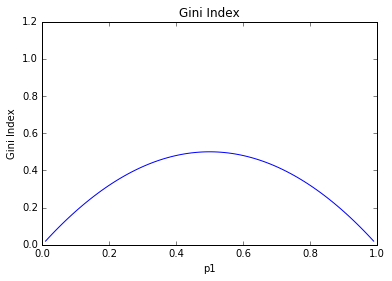

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
p = np.linspace(0.01, 0.99, 100, endpoint=True)

def entropy(p):
    q = 1 - p
    return (1 - p**2 - q**2)

gini = entropy(p)
plt.plot(p, gini)
plt.title("Gini Index")
plt.xlabel("p1")
plt.ylabel("Gini Index")
plt.ylim(0, 1.2)
plt.show()

Numerically, we can see that it makes sense to use the gini index as an alternative measure to minimize because this measure is maximum when a set has half the members belonging to one class and the other half belonging to another class. It is minimal when all members of a set belong to one class.

# 8. Pruning
If a decision tre is allowed to grow as deeply as possible, then we run into the danger of overfitting. Hence, there are a few common stopping criteria that people use to prevent overfitting and make the tree generalizable:

1. Maximum tree depth
2. Minimum number of samples at one node
3. Stop growing when the accuracy on the validation dataset does not improve
4. Stop growing when there is no statisticially significant association between any attribute and the class at a node based on the chi-square test of independence

There are two types of pruning - prepruning and postpruning. The difference is that postpruning allows the tree to grow to maximum depth possible before removing certain nodes. 

# 9. Regression Tree
Decision trees can easily be converted to do regression rather than classification with a few changes. The changes are:

1. Prediction is the average value of all samples at a leaf
2. Splitting criteria is to choose the attribute value that minimize average variance in children, or achieves greatest standard deviation reduction (SDR). Suppose the parent node is denoted as $P$ and we split the data into subsets $S_{i}$. $|S_{i}|$ and $|P|$ denote the number of samples at child node $i$ and number of samples in the parent node respectively. Then SDR is defined as:

$$SDR(P, S) = SD(P) - \sum_{i} \frac{|S_{i}|}{|P|}SD(S_{i})$$

3. Prepruning criteria can be lower bound on standard deviation in a node and/or number of examples in a node.

4. Postpruning criteria can remove nodes until the mean-square error on the validaiton dataset stops improving.